## Afwa Afini | PYTN-KS20-018


### Introduction
This Assignment 1 implements an understanding of data visualization using Python. The observed data is the data of crimes that occurred in the areas of the city of London from 2008 to 2016.    

### Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

mpl.style.use('tableau-colorblind10')
print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.7.2


In [58]:
# To hide the warning
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Data Preprocessing & EDA

In [59]:
# Load data source
df = pd.read_csv('./data/london_crime_by_lsoa.csv')

In [60]:
# Understanding the dataframe
print('dataframe shape : ', df.shape)
print('check the missing values : ', df.isna().values.any())
print(df.info())

dataframe shape :  (13490604, 7)
check the missing values :  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB
None


In [61]:
# View the first 10 data
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [62]:
# View summary of data describe
df.describe(include='all')

,lsoa_code,borough,major_category,minor_category,value,year,month
count,13490604,13490604,13490604,13490604,1.349060e+07,1.349060e+07,1.349060e+07
unique,4835,33,9,32,NaN,NaN,NaN
top,E01003689,Croydon,Theft and Handling,Common Assault,NaN,NaN,NaN
freq,3456,602100,3966300,522180,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.779444e-01,2.012000e+03,6.500000e+00
std,NaN,NaN,NaN,NaN,1.771513e+00,2.581989e+00,3.452053e+00
min,NaN,NaN,NaN,NaN,0.000000e+00,2.008000e+03,1.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,2.010000e+03,3.750000e+00
50%,NaN,NaN,NaN,NaN,0.000000e+00,2.012000e+03,6.500000e+00
75%,NaN,NaN,NaN,NaN,1.000000e+00,2.014000e+03,9.250000e+00


In [63]:
# View list of 'borough'
print('total unique of borough : ', df['borough'].nunique())
print(df['borough'].unique())

total unique of borough :  33
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [64]:
# View list of 'major_category'
print('total unique of major category : ', df['major_category'].nunique())
print(df['major_category'].unique())

total unique of major category :  9
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [65]:
# View list of 'minor_category'
print('total unique of minor category : ', df['minor_category'].nunique())
print(df['minor_category'].unique())

total unique of minor category :  32
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'
 'Handling Stolen Goods' 'Criminal Damage To Dwelling'
 'Burglary in a Dwelling' 'Criminal Damage To Motor Vehicle'
 'Other Criminal Damage' 'Counted per Victim' 'Going Equipped'
 'Other Fraud & Forgery' 'Assault with Injury' 'Drug Trafficking'
 'Other Drugs' 'Business Property' 'Other Notifiable' 'Other Sexual'
 'Theft From Motor Vehicle' 'Rape' 'Murder']


In [66]:
# View list of 'year'
print('total unique of year : ', df['year'].nunique())
print('minimum : ', df['year'].min())
print('maximum : ', df['year'].max())
print(df['year'].unique())

total unique of year :  9
minimum :  2008
maximum :  2016
[2016 2015 2008 2012 2010 2013 2014 2011 2009]


In [67]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

### 1 : Line Plot
This line graph visualization aims to see a comparison of the total value of crimes that occurred each year from 2008 to 2016 in the Newham and Croydon areas.

In [251]:
# create a dataframe for line chart
line_df = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
line_df = line_df.rename_axis(None, axis=0)
line_df.columns.name = None

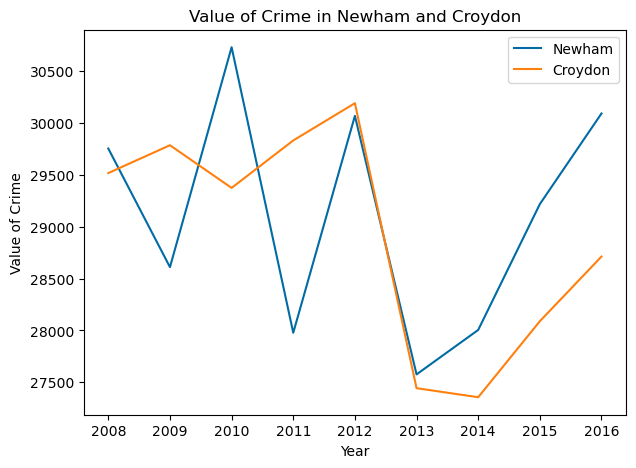

In [252]:
# selected the dataframe for display in the line chart
line_df = line_df.loc[['Newham', 'Croydon']]
line_df = line_df.transpose()

# create the line chart
line_df.plot(kind='line', figsize=(7,5))

# set the title and labels
plt.title('Value of Crime in Newham and Croydon')
plt.xlabel('Year')
plt.ylabel('Value of Crime')

# display the line chart
plt.show()

Insight: <br>
Based on the line chart above, it can be seen that from 2012 to 2013 there was a marked decrease in the crime rate in both areas. The graphs of the two areas are also quite volatile as the total value of crime always goes up and down every year. In the Newham area the change occurred significantly from 2008 to 2013 and continued to creep up until 2016. In the Croydon area the change from 2008 to 2012 was less significant but dropped dramatically in 2013 and leveled off again in 2014 and then increased again until 2016.

### 2 : Area Plot
This Area Plot visualization was made to include faceting by creating area plots for each of these subsets in separate subplots. Faceting also makes it possible to visualize comparisons between subsets of data more clearly and efficiently. The data to be visualized are the 10 boroughs with the highest total crime from 2008 to 2016.

In [243]:
# create a dataframe of the 10 areas with the highest crime scores
df_borough = df.groupby(by='borough')['value'].sum()
df_borough = df_borough.reset_index()
df_borough = df_borough.sort_values('value', ascending=False)
df_top10 =  df_borough.head(10)
df_top10

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


In [239]:
# create a dataframe to show the value of crime per borough each year
borough_each_year = df.groupby(['borough', 'year'])['value'].sum()
borough_each_year = borough_each_year.reset_index()

In [238]:
# create a dataframe to visualize area plot
df_faceting_area = borough_each_year[borough_each_year['borough'].isin(df_top10['borough'])]

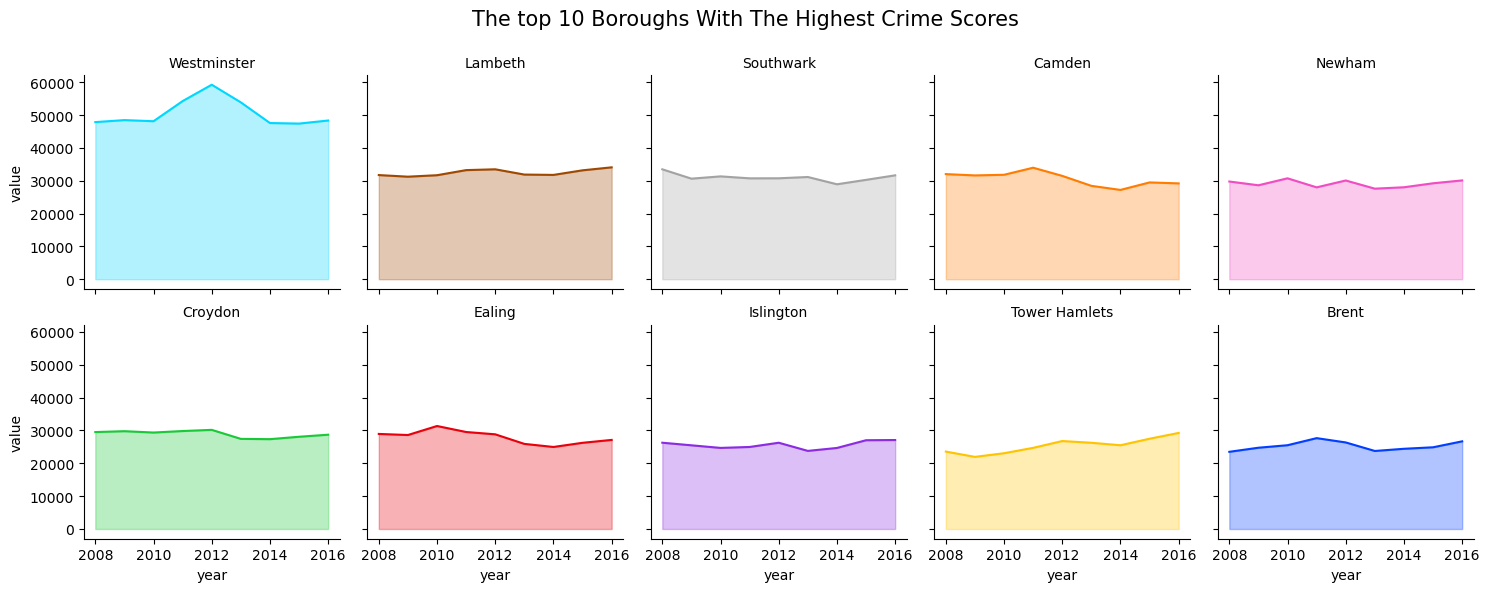

In [241]:
# create a custom variable to plot the sequence 
custom = df_top10['borough'].tolist()

# Create a grid : initialize it
g = sns.FacetGrid(df_faceting_area, col='borough', hue='borough', col_order=custom, col_wrap=5, palette='bright')

# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'value')
 
# fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'value', alpha=0.3).set_titles('{col_name} borough')

# control the tittle of each facet
g = g.set_titles('{col_name}')

# add a title for the whole plot
plt.subplots_adjust(top=0.87)
g = g.fig.suptitle('The top 10 Boroughs With The Highest Crime Scores', fontsize=15)

# show the graph
plt.show()

Insight: <br>
Based on the Area Plot above, it can be seen that the data visualization of the 10 boroughs with the highest total crime is displayed in subplots divided into 5 columns and 2 rows. The Westminster area is the most prominent among the other areas, which is why the area is ranked first with the highest total crime value from 2008 to 2016. For the other nine boroughs, there were no notable differences or significant ups and downs in the crime rate over the period.

### 3 : Histogram
This histogram visualization was created to illustrate the distribution of crime values across the 5 boroughs of London from 2008 to 2016.

In [74]:
# create a dataframe for histogram
new_df = df.pivot_table(index='year', columns='borough', values='value', aggfunc='sum')
new_df.columns.name = None
new_df.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,22010,22004,21114,25724,13774,15395,24318,20204,26273,20663,10661,31717,27054,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,19851,20718,21211,23704,13948,14538,24605,19783,25485,18742,10163,31225,25182,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,18626,20175,21941,22156,13945,14957,23421,19665,24693,19481,10171,31671,24532,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,18552,21395,22151,23179,12801,15496,24282,21105,24980,19146,10155,33224,24201,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,20028,27095,21030,23231,12803,15965,22103,22724,26268,19757,9956,33473,23652,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226


In [237]:
# select boroughs to display
hist_df = new_df[['Barnet', 'Lambeth', 'Southwark', 'Camden', 'Hackney']]

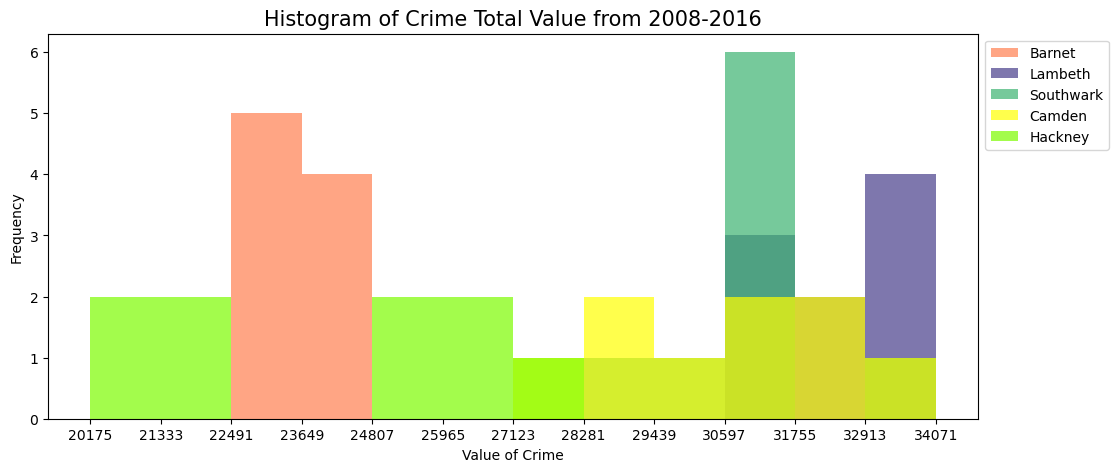

In [236]:
# set the bins
count, bin_edges = np.histogram(hist_df, 12)

# create the histogram
hist_df.plot(
    kind='hist',
    figsize=(12,5),
    bins=12,
    alpha=0.7,
    xticks=bin_edges,
    color=['coral', 'darkslateblue', 'mediumseagreen', 'yellow', 'lawngreen']
)

# set the title, label, and legend
plt.title('Histogram of Crime Total Value from 2008-2016', fontsize=15)
plt.xlabel('Value of Crime')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# display the histogram
plt.show()

Insight: <br>
Based on the histogram above, we can see how the five regions compare to the total frequency of crime values per year. <br>
The y-axis shows the frequency or number of such values in the data set. <br> 
The x-axis shows the range of total crime values divided into 12 ranges.

### 4 : Bar Chart
This Bar Chart visualization aims to show the ranking of categories based on the total frequency data of major crimes that occurred in London from 2008 to 2016.

In [231]:
# create a dataframe for bar chart
major = df.groupby(by='major_category')['major_category'].count().sort_values(ascending=True)

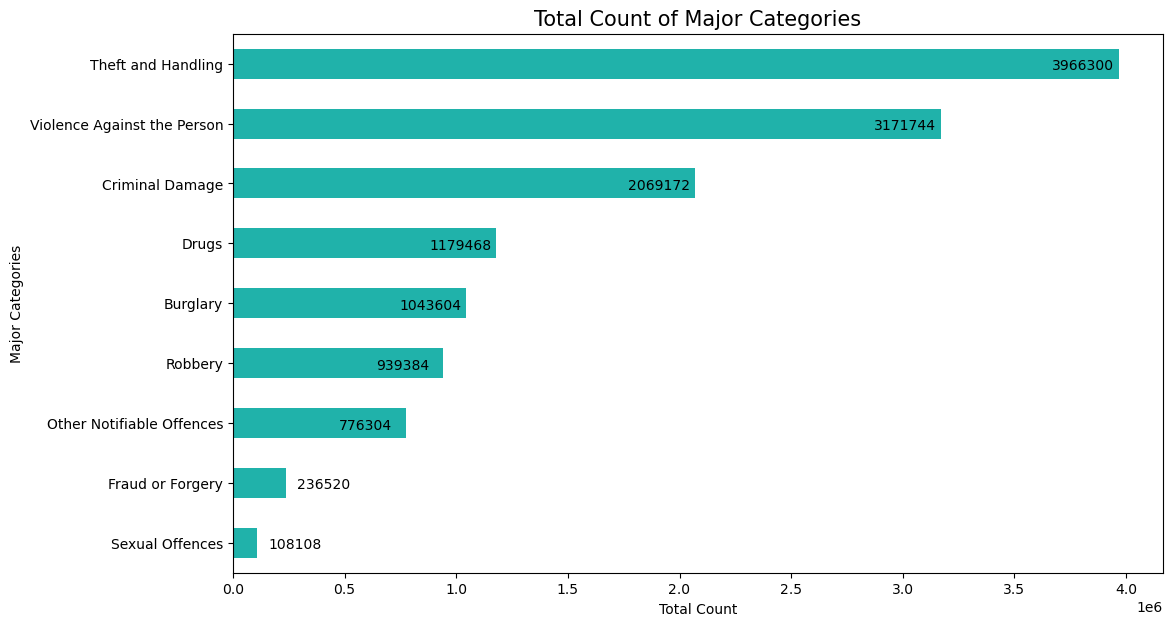

In [230]:
# create the bar chart
major.plot(kind='barh', figsize=(12, 7), color='lightseagreen')

# set the title and labels
plt.title('Total Count of Major Categories', fontsize=15)
plt.ylabel('Major Categories')
plt.xlabel('Total Count')

# set the annotate 
for index, value in enumerate(major):
    label = format(int(value), '-') 
    plt.annotate(label, xy=(value - 300000 if value > 300000 else value + 50000, index - 0.10), color='black')

# display the bar chart
plt.show()

Insight: <br>
Based on the bar chart, it can be seen that the Theft and Handling category occupies the first position as the highest major category and the lowest position is in the Sexual Offenses category.

### 5 : Pie Chart
This Pie Chart visualization aims to display information on the top 3 boroughs with the highest crime rates based on the total number of crimes that occurred during 2008 to 2016.

In [196]:
# create a dataframe for showed the top 3 borough with the highest score
df_borough = df.groupby(by='borough')['value'].sum().reset_index()
df_borough = df_borough.sort_values('value', ascending=False)
df_top3 =  df_borough.head(3)
df_top3.set_index('borough', inplace=True)
df_top3

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809


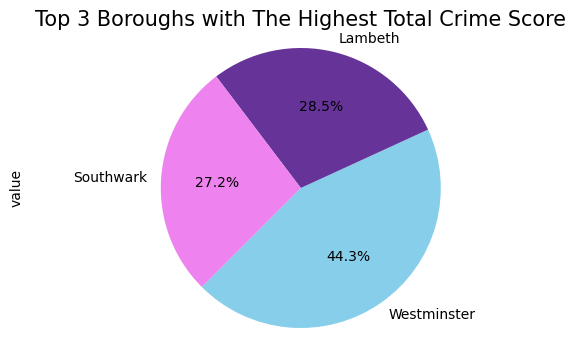

In [233]:
# create the list custom of colors
colors_list = ['skyblue', 'rebeccapurple', 'violet', 'yellow', 'khaki']

# create the pie chart
df_top3['value'].plot(kind='pie',
                 figsize=(7,4),
                 autopct='%1.1f%%',
                 startangle=225,
                 shadow=False,
                 colors=colors_list
                 )

# set the title and axis
plt.title('Top 3 Boroughs with The Highest Total Crime Score', fontsize=15)
plt.axis('equal')

# display the pie chart
plt.show()

Insight: <br>
Based on the pie chart above, it can be seen that the 3 boroughs with the highest crime scores are Westminster, Southwark, and Lambeth.

### 6 : Box Plot
The purpose of creating these boxplots is to provide a good visual representation of the data distribution and important statistical characteristics of each selected crime category.

In [193]:
# create a dataframe for boxplot
new_df2 = df.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')
new_df2.columns.name = None
new_df2.head(3)

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894


In [172]:
# choose 3 of major category data based on highest score crimes
df_box_major = new_df2[['Drugs', 'Criminal Damage', 'Burglary']]
df_box_major

,Drugs,Criminal Damage,Burglary
year,,,
2008,68804,91872,88092
2009,60549,85565,90619
2010,58674,77897,86826
2011,57550,70914,93315
2012,51776,62158,93392
2013,50278,56206,87222
2014,44435,59279,76053
2015,39785,62976,70489
2016,38914,64071,68285


In [173]:
# view summary of data describe
df_box_major.describe()

,Drugs,Criminal Damage,Burglary
count,9.000000,9.000000,9.000000
mean,52307.222222,70104.222222,83810.333333
std,10066.338892,12424.545824,9658.166674
min,38914.000000,56206.000000,68285.000000
25%,44435.000000,62158.000000,76053.000000
50%,51776.000000,64071.000000,87222.000000
75%,58674.000000,77897.000000,90619.000000
max,68804.000000,91872.000000,93392.000000


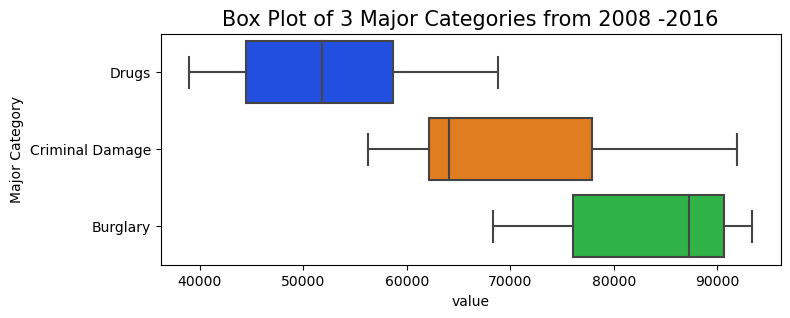

In [192]:
# create the boxplot and display
plt.figure(figsize=(8, 3))
sns.boxplot(df_box_major[['Drugs', 'Criminal Damage', 'Burglary']], orient='h', palette='bright')

plt.title('Box Plot of 3 Major Categories from 2008 -2016', fontsize=15)
plt.xlabel('value')
plt.ylabel('Major Category')

plt.show()

Insight: <br>
Overall, these three crime categories seen in this boxplot have quite different averages from each other, with Burglary having the highest average, followed by Criminal Damage and Drugs. <br> However, the distribution of their data tends to be dense around the mean, and there are no visible outliers in these three categories. <br>


### 7 : Scatter Plot

This Scatter Plot visualization aims to identify the trend of total crime in London boroughs by month from 2008-2016 and compare it to the average crime per year. <br>

Note: <br>
This scatter plot visualization will be made into 3 parts. <br>
1 Scatter Plot shows information per 4 months for easy viewing of changes.

In [90]:
# create new dataframe for scatter plot
new_df3 = df.pivot_table(index='year', columns=['month'], values='value', aggfunc='sum')
new_df3.columns.name = None
new_df3

,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2008,65419,62626,61343,59640,62587,62290,64126,59959,58414,63354,61395,57488
2009,59142,54706,63482,59181,62897,63116,63281,58695,57847,61176,59456,54235
2010,54934,55069,63629,60085,62126,62632,63764,59040,59731,62113,60665,51536
2011,57966,54895,61282,58714,62630,61822,62428,59117,58640,63622,64119,59680
2012,62436,56735,67537,58801,64344,62281,63280,62143,56912,61728,62514,58618
2013,58933,55271,57590,55678,56765,56839,60508,57467,54924,59956,58267,54209
2014,55515,51222,57669,53467,56327,57039,58564,55641,56933,60537,59704,57565
2015,57055,53316,60096,56445,61038,60760,61606,58056,57564,62361,62487,60840
2016,58847,56697,59167,58637,63990,62262,65519,62666,61412,63405,61064,62455


In [168]:
# add new column for 'mean' per year
new_df3['mean'] = new_df3.loc[:, 1:12].mean(axis=1)
new_df3.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,mean
year,,,,,,,,,,,,,
2008,65419,62626,61343,59640,62587,62290,64126,59959,58414,63354,61395,57488,61553.416667
2009,59142,54706,63482,59181,62897,63116,63281,58695,57847,61176,59456,54235,59767.833333


In [ ]:
# change the index
new_df3.index = map(int, new_df3.index)
new_df3.index.name = 'Year'
new_df3.reset_index(inplace=True)

In [ ]:
# View summary of data describe
new_df3.describe()

,Year,1,2,3,4,5,6,7,8,9,10,11,12,mean
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2012.000000,58916.333333,55615.222222,61310.555556,57849.777778,61411.555556,61004.555556,62564.000000,59198.222222,58041.888889,62028.000000,61074.555556,57402.888889,59701.462963
std,2.738613,3288.701872,3120.981968,3202.231063,2183.559295,2924.328688,2392.047351,2085.725593,2194.210495,1843.936783,1306.020865,1802.314006,3512.293497,1775.114213
min,2008.000000,54934.000000,51222.000000,57590.000000,53467.000000,56327.000000,56839.000000,58564.000000,55641.000000,54924.000000,59956.000000,58267.000000,51536.000000,56681.916667
25%,2010.000000,57055.000000,54706.000000,59167.000000,56445.000000,61038.000000,60760.000000,61606.000000,58056.000000,56933.000000,61176.000000,59704.000000,54235.000000,59302.000000
50%,2012.000000,58847.000000,55069.000000,61282.000000,58714.000000,62587.000000,62262.000000,63280.000000,59040.000000,57847.000000,62113.000000,61064.000000,57565.000000,59767.833333
75%,2014.000000,59142.000000,56697.000000,63482.000000,59181.000000,62897.000000,62290.000000,63764.000000,59959.000000,58640.000000,63354.000000,62487.000000,59680.000000,61343.416667
max,2016.000000,65419.000000,62626.000000,67537.000000,60085.000000,64344.000000,63116.000000,65519.000000,62666.000000,61412.000000,63622.000000,64119.000000,62455.000000,61553.416667


In [ ]:
# melihat rata-rata kejahatan per tahunnya
new_df3[['Year', 'mean']].sort_values(by='mean', ascending=True)

,Year,mean
6,2014,56681.916667
5,2013,57200.583333
7,2015,59302.000000
2,2010,59610.333333
1,2009,59767.833333
3,2011,60409.583333
8,2016,61343.416667
4,2012,61444.083333
0,2008,61553.416667


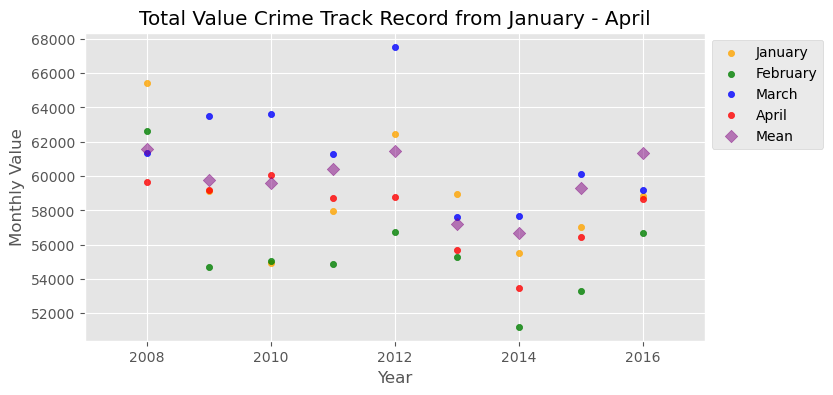

In [ ]:
# Set the Scatter 1 : January - April
ax = new_df3.plot(kind='scatter', x='Year', y=1, figsize=(8,4), color='orange', alpha=0.8, xlim=(2007, 2017), label='January')
new_df3.plot(kind='scatter', x='Year', y=2, color='green', alpha=0.8, ax=ax, label='February')
new_df3.plot(kind='scatter', x='Year', y=3, color='blue', alpha=0.8, ax=ax, label='March')
new_df3.plot(kind='scatter', x='Year', y=4, color='red', alpha=0.8, ax=ax, label='April')
new_df3.plot(kind='scatter', x='Year', y='mean', color='purple', alpha=0.5, ax=ax, marker='D', s=40, label='Mean')

 # add title and labels    
ax.set_title('Total Value Crime Track Record from January - April')
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Value')

# add legend and display
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Insight: <br>
The graph 'Total Value Crime Track Record from January - April' shows that the crime trend in February tends to be low when compared to the annual average. <br>Although there was a spike in 2008, in the following years until 2016, it was still below the annual average.

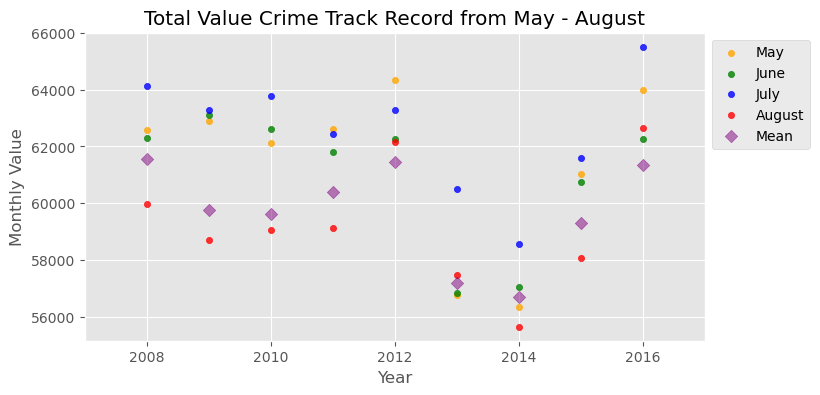

In [ ]:
# Set the Scatter 2 : May - August
ax = new_df3.plot(kind='scatter', x='Year', y=5, figsize=(8,4), color='orange', alpha=0.8, xlim=(2007, 2017), label='May')
new_df3.plot(kind='scatter', x='Year', y=6, color='green', alpha=0.8, ax=ax, label='June')
new_df3.plot(kind='scatter', x='Year', y=7, color='blue', alpha=0.8, ax=ax, label='July')
new_df3.plot(kind='scatter', x='Year', y=8, color='red', alpha=0.8, ax=ax, label='August')
new_df3.plot(kind='scatter', x='Year', y='mean', color='purple', alpha=0.5, ax=ax, marker='D', s=40, label='Mean')
  
# add title and labels 
ax.set_title('Total Value Crime Track Record from May - August')
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Value')

# add legend and display
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Insight: <br>
The 'Total Value Crime Track Record from May - August' graph shows that the crime trend in July tends to be high as the value is always greater than the average crime per year.

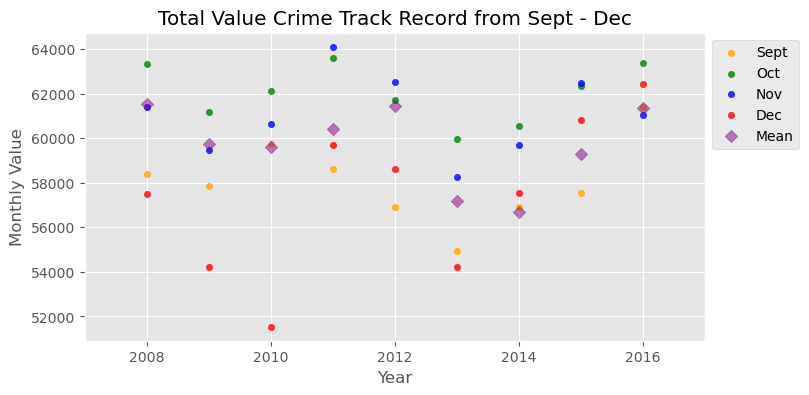

In [ ]:
# Set the Scatter 3 : September - December
ax = new_df3.plot(kind='scatter', x='Year', y=9, figsize=(8,4), color='orange', alpha=0.8, xlim=(2007, 2017), label='Sept')
new_df3.plot(kind='scatter', x='Year', y=10, color='green', alpha=0.8, ax=ax, label='Oct')
new_df3.plot(kind='scatter', x='Year', y=11, color='blue', alpha=0.8, ax=ax, label='Nov')
new_df3.plot(kind='scatter', x='Year', y=12, color='red', alpha=0.8, ax=ax, label='Dec')
new_df3.plot(kind='scatter', x='Year', y='mean', color='purple', alpha=0.5, ax=ax, marker='D', s=40, label='Mean')
     
# add title and labels
ax.set_title('Total Value Crime Track Record from Sept - Dec')
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Value')

# add legend and display
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Insight: <br>
The 'Total Value Crime Track Record from Sept - Dec' graph shows that the crime trend in October tends to be high because the value is always greater than the average crime per year.


The final conclusion includes the results of the three scatter plot graphs above, namely: <br>
1. The lowest average crime was in 2014 <br>
2. The highest average crime was in 2008 

### 8 : WordCloud

The WordCloud visualization will display information on the name of the region of the total crimes that occurred.<br>
The larger the word writing produced in the visualization shows that the area has a high crime rate.


In [155]:
# create a dataframe for wordcloud
borough_wc = df.groupby(by='borough')['value'].sum().reset_index()
borough_wc.head()

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349


In [156]:
# prepared data for wordcloud
wc_dict = dict(zip(borough_wc['borough'], borough_wc['value']))
wc_dict

{'Barking and Dagenham': 149447,
 'Barnet': 212191,
 'Bexley': 114136,
 'Brent': 227551,
 'Bromley': 184349,
 'Camden': 275147,
 'City of London': 780,
 'Croydon': 260294,
 'Ealing': 251562,
 'Enfield': 193880,
 'Greenwich': 181568,
 'Hackney': 217119,
 'Hammersmith and Fulham': 185259,
 'Haringey': 213272,
 'Harrow': 116848,
 'Havering': 138947,
 'Hillingdon': 209680,
 'Hounslow': 186772,
 'Islington': 230286,
 'Kensington and Chelsea': 171981,
 'Kingston upon Thames': 89306,
 'Lambeth': 292178,
 'Lewisham': 215137,
 'Merton': 115654,
 'Newham': 262024,
 'Redbridge': 183562,
 'Richmond upon Thames': 96771,
 'Southwark': 278809,
 'Sutton': 100987,
 'Tower Hamlets': 228613,
 'Waltham Forest': 203879,
 'Wandsworth': 204741,
 'Westminster': 455028}

In [157]:
# create wordcloud
london_wordcloud = WordCloud(width=800,
                             height=400,
                             background_color='white'
                             ).generate_from_frequencies(wc_dict)

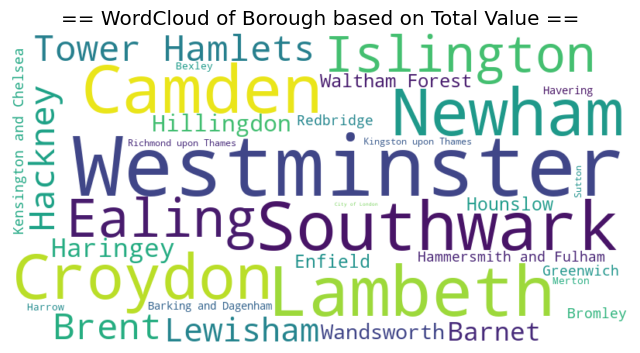

In [ ]:
# create wordcloud figure and display
plt.figure(figsize=(8, 7))
plt.imshow(london_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('== WordCloud of Borough based on Total Value ==')
plt.show()

Insight:
<br>
Wordcloud results show that the word 'Westminster' is the largest. <br> Which means that the city of Westminster is ranked first
in the list of most crimes in London from 2008-2016.

### 9 : Folium Maps
This visualization uses choropleth maps, which are thematic maps where shaded or patterned areas are proportional to measurements of statistical variables.<br> In this case, the map of London is used as the focus object and data is displayed about the relationship between the area and the total number of crimes that occurred from 2008 to 2016.

In [150]:
# create a dataframe for folium maps
new_df4 = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum').reset_index()
new_df4.columns.name = None
new_df4.head()

,borough,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
1,Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
2,Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
3,Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
4,Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [158]:
# add new column 'Total'
new_df4['Total'] = new_df4.loc[:, 2008:2016].sum(axis=1)
new_df4.head(2)

,borough,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
0,Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
1,Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191


In [ ]:
# check ordered by sort value of 'Total' (descending)
new_df4[['borough', 'Total']].sort_values(by='Total', ascending=False).head()

,borough,Total
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024


In [ ]:
# check ordered by sort value of 'Total' (ascending)
new_df4[['borough', 'Total']].sort_values(by='Total', ascending=False).tail()

,borough,Total
2,Bexley,114136
28,Sutton,100987
26,Richmond upon Thames,96771
20,Kingston upon Thames,89306
6,City of London,780


In [166]:
# initiate json file of london map
world_geo = r'./data/london_boroughs.geojson'

In [161]:
# create a plain world map 
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='cartodb positron')

In [164]:
# generate choropleth map using total value of crime each borough from 2008 to 2016
london_map.choropleth(
    geo_data=world_geo,
    data=new_df4,
    columns=['borough', 'Total'],
    key_on='feature.properties.name',
    fill_color='BuPu', # Blue-Purple
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Value of Crime'
)

In [167]:
# display the map 
london_map

Insight: <br>
Based on the Choropleth Map of crime data for each London borough from 2008-2016, we can see that the more intense the color, the higher the crime rate. <br>
Conversely, the fainter the color, the lower the crime rate. <br>
Faded colors indicate that the total crime rate is low and the area is safe from crime. <br>
The area with the highest total crime is Westminster. The safest area with the lowest crime rate is the City of London.